Code: https://iq.opengenus.org/hopfield-network/

Other code: https://github.com/philipjk/genetic_algorithm_optimization_sklearn-based/blob/master/hopfield_networks.ipynb

Best code: https://github.com/takyamamoto/Hopfield-Network

In [6]:
import matplotlib.pyplot as plt
import numpy as np

nb_patterns = 4   # Number of patterns to learn
pattern_width = 5
pattern_height = 5
max_iterations = 10

# Define Patterns
patterns = np.array([
   [1,-1,-1,-1,1,1,-1,1,1,-1,1,-1,1,1,-1,1,-1,1,1,-1,1,-1,-1,-1,1.],   # Letter D
   [-1,-1,-1,-1,-1,1,1,1,-1,1,1,1,1,-1,1,-1,1,1,-1,1,-1,-1,-1,1,1.],    # Letter J
   [1,-1,-1,-1,-1,-1,1,1,1,1,-1,1,1,1,1,-1,1,1,1,1,1,-1,-1,-1,-1.],     # Letter C
   [-1,1,1,1,-1,-1,-1,1,-1,-1,-1,1,-1,1,-1,-1,1,1,1,-1,-1,1,1,1,-1.],], # Letter M 
   dtype=np.float)


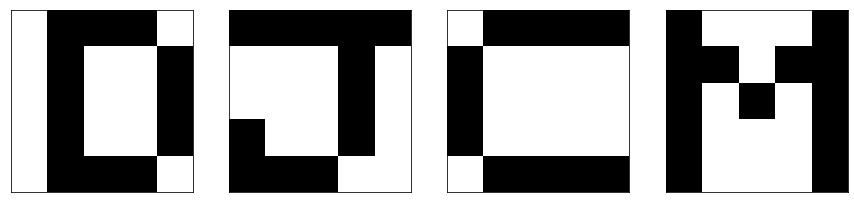

In [7]:
# Show the patterns
fig, ax = plt.subplots(1, nb_patterns, figsize=(15, 10))

for i in range(nb_patterns):
    ax[i].matshow(patterns[i].reshape((pattern_height, pattern_width)), cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

Use the equation to train the network: outer product between input vector and transposed input vector to fill the weighted matrix wij (or synaptic weights) and in case of many patterns. 

<img src="https://iq.opengenus.org/content/images/2019/10/eq4.JPG">


In [9]:
# Train the network
W = np.zeros((pattern_width * pattern_height, pattern_width * pattern_height))

for i in range(pattern_width * pattern_height):
    for j in range(pattern_width * pattern_height):
        if i == j or W[i, j] != 0.0:
            continue
            
        w = 0.0
        
        for n in range(nb_patterns): #4 patterns exist 
            w += patterns[n, i] * patterns[n, j]
            
        W[i, j] = w / patterns.shape[0]  
        W[j, i] = W[i, j]  

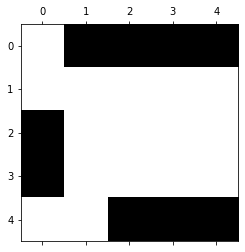

In [10]:
# Test the Network
# Create a corrupted pattern S
S = np.array(    [1,-1,-1,-1,-1,1,1,1,1,1,-1,1,1,1,1,-1,1,1,1,1,1,1,-1,-1,-1.],     
   dtype=np.float)
   
# Show the corrupted pattern
fig, ax = plt.subplots()
ax.matshow(S.reshape((pattern_height, pattern_width)), cmap='gray')

array([[13., 11.,  4., 12.],
       [13.,  9.,  2., 12.],
       [12.,  8.,  1., 13.],
       [11.,  9.,  0., 14.],
       [11.,  9.,  0., 14.],
       [11.,  9.,  0., 14.],
       [11.,  9.,  0., 14.],
       [11.,  9.,  0., 14.],
       [11.,  9.,  0., 14.],
       [11.,  9.,  0., 14.]])

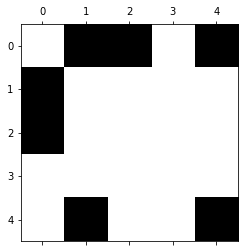

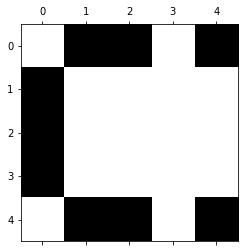

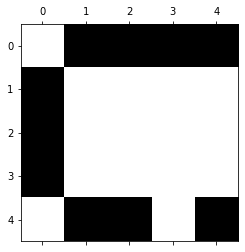

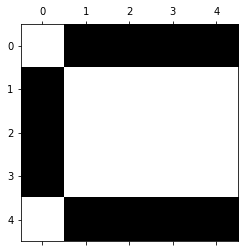

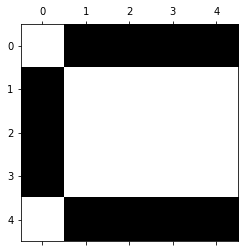

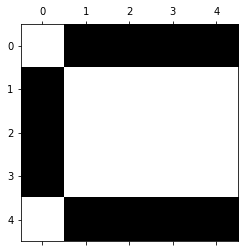

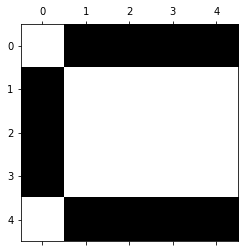

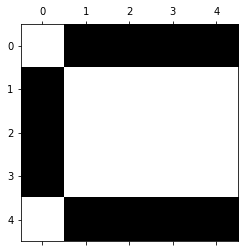

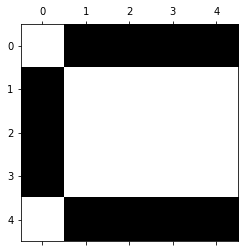

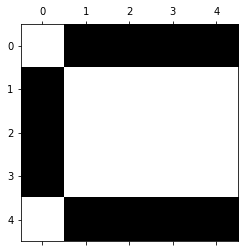

In [11]:
h = np.zeros((pattern_width * pattern_height))
#Defining Hamming Distance matrix for seeing convergence 
hamming_distance = np.zeros((max_iterations,nb_patterns))
for iteration in range(max_iterations):
    for i in range(pattern_width * pattern_height):
        i = np.random.randint(pattern_width * pattern_height)
        h[i] = 0
        for j in range(pattern_width * pattern_height):
            h[i] += W[i, j]*S[j]
        S = np.where(h<0, -1, 1)
    for i in range(nb_patterns):
        hamming_distance[iteration, i] = ((patterns - S)[i]!=0).sum()   
    
    fig, ax = plt.subplots()
    ax.matshow(S.reshape((pattern_height, pattern_width)), cmap='gray')
hamming_distance

Version 2

In [26]:
import matplotlib.cm as cm
def make_pattern(x):
    # make a pattern for letters
    return np.array([+1 if c=='X' else -1 for c in x.replace('\n','')])

# write a 5x5 pattern for letter A and X
A = """
.XXX.
X...X
XXXXX
X...X
X...X
"""

X = """
X...X
.X.X.
..X..
.X.X.
X...X
"""

def showw(pa):
    # show the patterns using imshow
    plt.imshow(pa.reshape((5,5)),cmap= cm.binary, interpolation='nearest')
    plt.show()

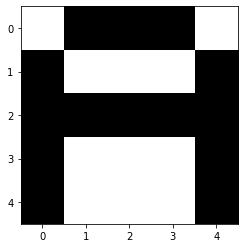

In [27]:
showw(make_pattern(A))

In [31]:
# convert to array
all_patterns = np.array([make_pattern(A), make_pattern(X)])
def training_model(memory):
    # make the shape of network
    rr, cc = memory.shape
    # set weight to be zero
    weight = np.zeros((cc, cc))

    for m in memory:
        # update weight
        weight = weight + np.outer(m,m) #The entire training
        
    weight[np.diag_indices(cc)] = 0 
    return weight/rr

weights = training_model(all_patterns)

In [32]:
def recall_pattern(W, pattern, steps=5, verbose=False):
    s = np.vectorize(lambda x: -1 if x<0 else +1)
    # recall the pattern after being corrupted and show number of iterations
    for p in range(steps):       
        pattern = s(np.dot(pattern,W))
        if verbose == True:
            print("iteration %d:" %p)
            showw(pattern)
        
    return pattern

# make corrupted patterns
A_corrupt = """
.XXX.
X..XX
XX..X
X...X
X.XXX
"""

X_corrupt = """
XX..X
...X.
.XX..
...X.
X...X
"""

recall_pattern(weights, make_pattern(A_corrupt))

array([-1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1,  1,  1, -1, -1, -1,  1])

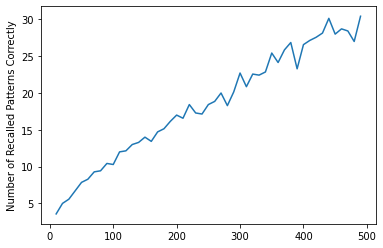

In [28]:
def testing(size):
    
    n = 1                   
    while True:
        patt = gen(n, size)
        patt = np.reshape(patt, (n,size))
        # make corrupt patterns
        bad_patterns = [p for p in corrupt(patt)]
        bad_patterns = np.reshape(bad_patterns, (n,size))
        # use recall_pattern function to make the correct pattern
        weights = training_model(patt)
        correct_patterns = recall_pattern(weights, bad_patterns)
        # calculate the capacity
        if np.any(np.not_equal(correct_patterns,patt)):
            break
        else:
            n +=1 
    return n

def gen(n, size):
    # generate patterns
    patt = []
    for i in range(n):
        patt.append(np.random.choice((-1,1),size=size))
    return patt
    
def corrupt(patt):
    # make corrupt patterns
    i = np.random.randint((np.shape(patt)[1]))
    patt[0][i] = -patt[0][i]
    return (patt)

In [ ]:
# save the results and show them
results = []
sizee = [l for l in range(10,500,10)]
for z in sizee:
    capacity = []
    for i in range(7):
        capacity.append(testing(z))
    avg_capacity = np.average(capacity)
    results.append(avg_capacity)

plt.plot(sizee, results)
plt.ylabel("Number of Recalled Patterns Correctly")
plt.show()

# Version 3

In [17]:
import numpy as np
import sklearn.datasets

# Define functions to initialize weights of the network

class HopfieldNetwork:
    
    def __init__(self,memories):
        self.num_neurons = memories.shape[1] if memories.ndim > 1 else memories.size
        self.reset()
        self.num_memories = 0
        self.store(memories)
    
    def reset(self):
        # Clear all weights
        self.weights = np.zeros((self.num_neurons, self.num_neurons))
        
    def store(self,memories):
        # Each memory is a row in the memories matrix
        memories = np.atleast_2d(np.array(memories))
        additional_memories = memories.shape[0]
        new_weights = np.sum([np.outer(l, l) for l in memories], axis=0)
        self.weights = (self.num_memories * self.weights + new_weights)/(self.num_memories + additional_memories)
        np.fill_diagonal(self.weights,0)
        self.num_memories += additional_memories
        
    def __str__(self):
        return str(self.weights)
        
    def recall(self, state):
        print(state)
        old_state = state.copy()
        i = 0
        while True:
            print(f"Iteration {i}: {state}")
            state[i % self.num_neurons] = np.sign(self.weights[i % self.num_neurons,:] @ state + 0.01)
            i += 1
            if (i % self.num_neurons) == 0:
                if all(old_state == state):
                    break
                old_state = state.copy()
        return state
    
memories = np.random.randint(0,2,size=(2,10))*2 - 1
print(memories)
    
test = HopfieldNetwork(memories)
test.recall(np.random.randint(0,2,size=10)*2 - 1)



[[ 1 -1 -1  1  1  1  1 -1  1 -1]
 [ 1  1  1  1  1 -1 -1 -1  1  1]]
[-1  1 -1  1 -1 -1  1 -1 -1 -1]
Iteration 0: [-1  1 -1  1 -1 -1  1 -1 -1 -1]
Iteration 1: [ 1  1 -1  1 -1 -1  1 -1 -1 -1]
Iteration 2: [ 1 -1 -1  1 -1 -1  1 -1 -1 -1]
Iteration 3: [ 1 -1 -1  1 -1 -1  1 -1 -1 -1]
Iteration 4: [ 1 -1 -1  1 -1 -1  1 -1 -1 -1]
Iteration 5: [ 1 -1 -1  1  1 -1  1 -1 -1 -1]
Iteration 6: [ 1 -1 -1  1  1  1  1 -1 -1 -1]
Iteration 7: [ 1 -1 -1  1  1  1  1 -1 -1 -1]
Iteration 8: [ 1 -1 -1  1  1  1  1 -1 -1 -1]
Iteration 9: [ 1 -1 -1  1  1  1  1 -1  1 -1]
Iteration 10: [ 1 -1 -1  1  1  1  1 -1  1 -1]
Iteration 11: [ 1 -1 -1  1  1  1  1 -1  1 -1]
Iteration 12: [ 1 -1 -1  1  1  1  1 -1  1 -1]
Iteration 13: [ 1 -1 -1  1  1  1  1 -1  1 -1]
Iteration 14: [ 1 -1 -1  1  1  1  1 -1  1 -1]
Iteration 15: [ 1 -1 -1  1  1  1  1 -1  1 -1]
Iteration 16: [ 1 -1 -1  1  1  1  1 -1  1 -1]
Iteration 17: [ 1 -1 -1  1  1  1  1 -1  1 -1]
Iteration 18: [ 1 -1 -1  1  1  1  1 -1  1 -1]
Iteration 19: [ 1 -1 -1  1  1  1  1 -

array([ 1, -1, -1,  1,  1,  1,  1, -1,  1, -1])